# Projet Data Science : Analyse des ventes en supermarché avec Machine Learning

## Objectif
Ce projet vise à analyser un jeu de données de ventes d'un supermarché pour prédire la satisfaction des clients (évaluée à travers la variable `Rating`). L'analyse repose sur des techniques de Machine Learning, notamment la régression linéaire et Random Forest, pour identifier les facteurs influençant cette satisfaction.

## Dataset
Le jeu de données utilisé est `supermarket_sales - Sheet1.csv`, qui contient des informations sur les achats effectués dans un supermarché. Les variables incluent des informations sur les produits, les clients, les montants des ventes, etc.

### Variables principales :
- **Branch** : Branche du supermarché (A, B, C)
- **City** : Ville du supermarché
- **Customer type** : Type de client (Membre / Non-membre)
- **Gender** : Sexe du client
- **Product line** : Catégorie du produit
- **Unit price** : Prix unitaire du produit
- **Quantity** : Quantité de produits achetés
- **Tax 5%** : Taxe appliquée
- **Total** : Montant total incluant la taxe
- **Payment** : Méthode de paiement (Cash, Credit card, Ewallet)
- **COGS** : Coût des biens vendus
- **Gross margin percentage** : Pourcentage de marge brute
- **Gross income** : Revenu brut
- **Rating** : Note de satisfaction client (sur une échelle de 1 à 10)

## Méthodologie
1. **Préparation des données** : Nettoyage, transformation des variables catégorielles, gestion des valeurs manquantes.
2. **Exploration des données** : Analyse des distributions et des relations entre les variables.
3. **Modélisation** : Application de modèles de régression pour prédire le `Rating`.
4. **Évaluation des modèles** : Utilisation du RMSE et du R² pour évaluer la performance.

---

N'oubliez pas de **suivre les étapes ci-dessous pour installer les dépendances nécessaires** et exécuter le code.


In [31]:
# Étape 1 : Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Affichage des graphiques dans le notebook
%matplotlib inline

# Style de graphique
sns.set(style="whitegrid")

print("📦 Bibliothèques chargées avec succès !")


📦 Bibliothèques chargées avec succès !


In [193]:
# Chargement des données

df = pd.read_csv("supermarket_sales - Sheet1.csv")

# Aperçu des premières lignes
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [43]:
# Dimensions du dataset
print(f"Dimensions : {df.shape}")

# Types de données et valeurs manquantes
df.info()

# Statistiques descriptives
df.describe(include="all")


Dimensions : (1000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  g

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN,NaN,NaN
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2/7/2019,19:48,Ewallet,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,NaN,NaN,NaN,307.58738,4.761905e+00,15.379369,6.97270
std,NaN,NaN,NaN,NaN,NaN,NaN,26.494628,2.923431,11.708825,245.885335,NaN,NaN,NaN,234.17651,6.131498e-14,11.708825,1.71858
min,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,NaN,NaN,10.17000,4.761905e+00,0.508500,4.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,NaN,NaN,NaN,118.49750,4.761905e+00,5.924875,5.50000
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,NaN,NaN,NaN,241.76000,4.761905e+00,12.088000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,NaN,NaN,NaN,448.90500,4.761905e+00,22.445250,8.50000


In [218]:
df.describe() # valeurs quantitatives seulement

,Unit price,Quantity,Total,cogs,Rating
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000
mean,55.672130,5.510000,322.966749,307.58738,6.97270
std,26.494628,2.923431,245.885335,234.17651,1.71858
min,10.080000,1.000000,10.678500,10.17000,4.00000
25%,32.875000,3.000000,124.422375,118.49750,5.50000
50%,55.230000,5.000000,253.848000,241.76000,7.00000
75%,77.935000,8.000000,471.350250,448.90500,8.50000
max,99.960000,10.000000,1042.650000,993.00000,10.00000


# Étape 1 : Analyse des catégories clients

### Voici les premiers graphiques qu’on peut générer pour explorer :

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

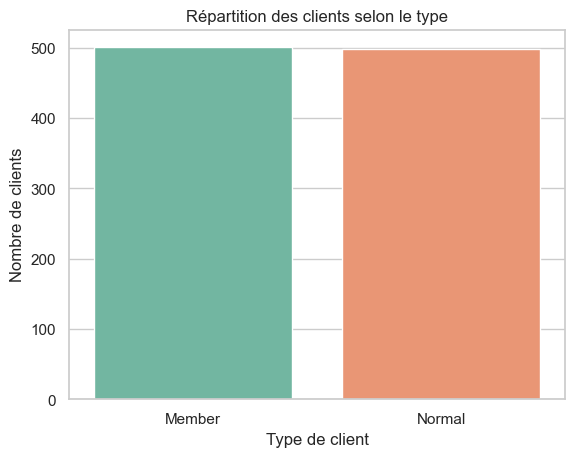

In [66]:
# Repartition des clients selon le type
sns.countplot(data=df, x='Customer type', hue='Customer type', palette='Set2')
plt.title('Répartition des clients selon le type')
plt.xlabel('Type de client')
plt.ylabel('Nombre de clients')
plt.show()


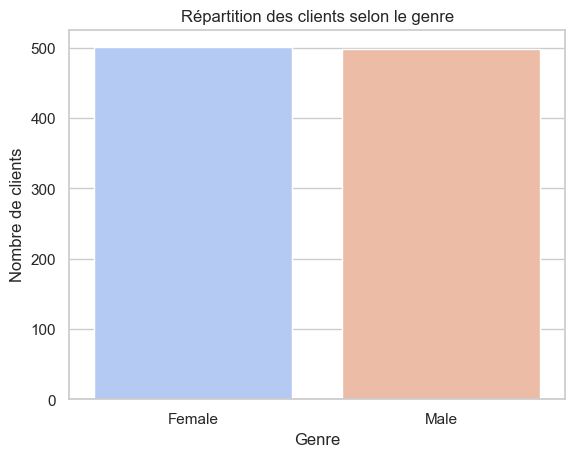

In [68]:
# Repartition des clients selon le genre
sns.countplot(data=df, x='Gender', hue='Gender', palette='coolwarm')
plt.title('Répartition des clients selon le genre')
plt.xlabel('Genre')
plt.ylabel('Nombre de clients')
plt.show()

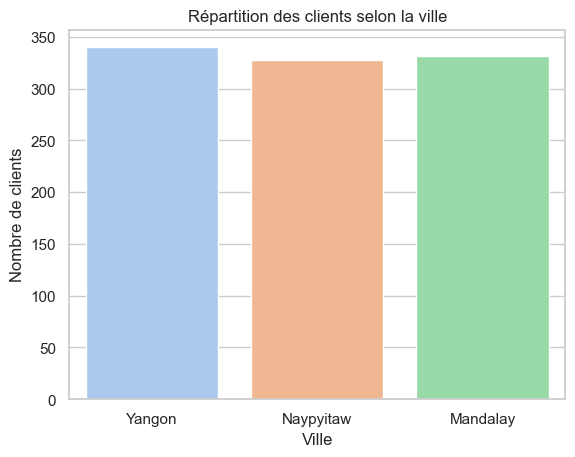

In [72]:
# Repartition des clients par ville
sns.countplot(data=df, x='City', hue='City', palette='pastel')
plt.title('Répartition des clients selon la ville')
plt.xlabel('Ville')
plt.ylabel('Nombre de clients')
plt.show()


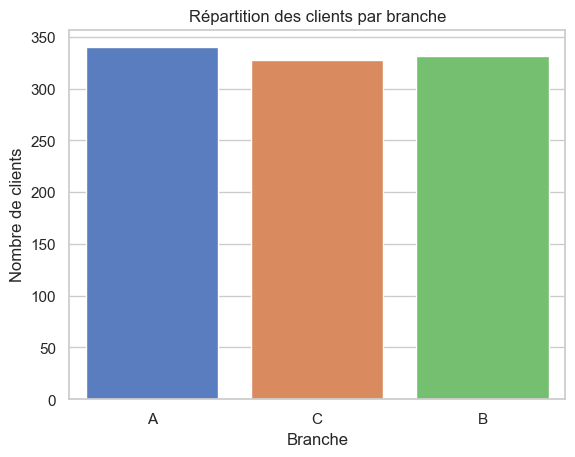

In [76]:
# Repartition des clients par branche
sns.countplot(data=df, x='Branch', hue='Branch', palette='muted')
plt.title('Répartition des clients par branche')
plt.xlabel('Branche')
plt.ylabel('Nombre de clients')
plt.show()


### Étape 2 : Analyse des ventes par catégorie

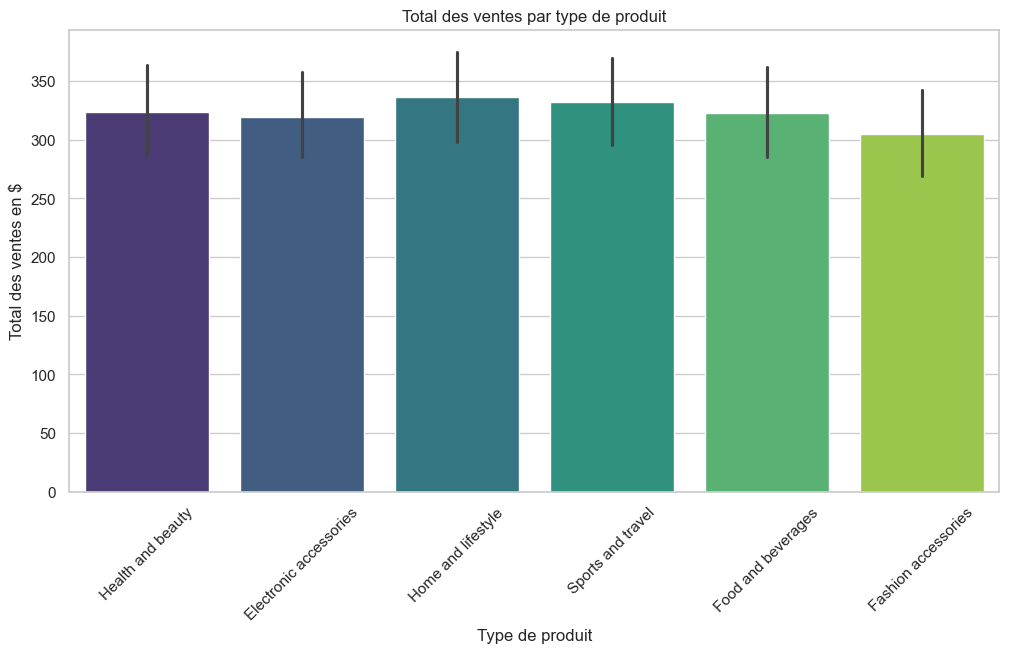

In [99]:
#  Répartition des ventes totales par type de produit

plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Product line', hue='Product line', y='Total',  palette='viridis')
plt.title('Total des ventes par type de produit')
plt.xlabel('Type de produit')
plt.ylabel('Total des ventes en $')
plt.xticks(rotation=45)
plt.show()

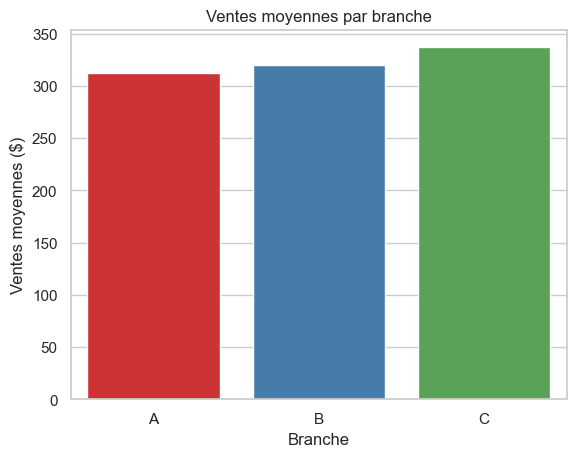

In [112]:
# Ventes moyennes par branche (A, B, C)

branch_sales = df.groupby('Branch')['Total'].mean().reset_index()
sns.barplot(data=branch_sales, x='Branch', hue='Branch', y='Total', palette='Set1')
plt.title('Ventes moyennes par branche')
plt.xlabel('Branche')
plt.ylabel('Ventes moyennes ($)')
plt.show()


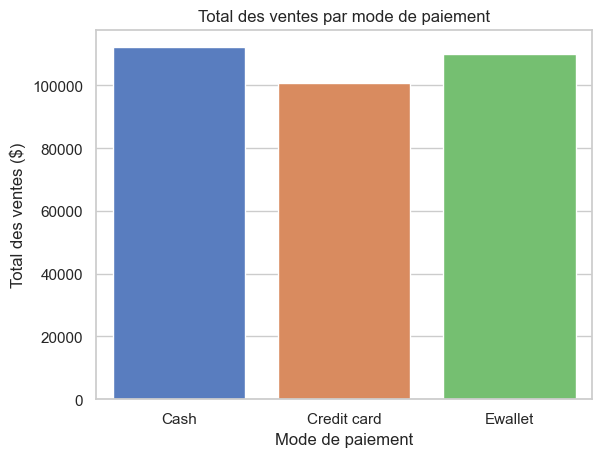

In [107]:
# Ventes par mode de paiement

payment_sales = df.groupby('Payment')['Total'].sum().reset_index()
sns.barplot(data=payment_sales, x='Payment', hue='Payment', y='Total', palette='muted')
plt.title('Total des ventes par mode de paiement')
plt.xlabel('Mode de paiement')
plt.ylabel('Total des ventes ($)')
plt.show()


## Analyse du COGS (Coût des produits vendus) et Marge brute

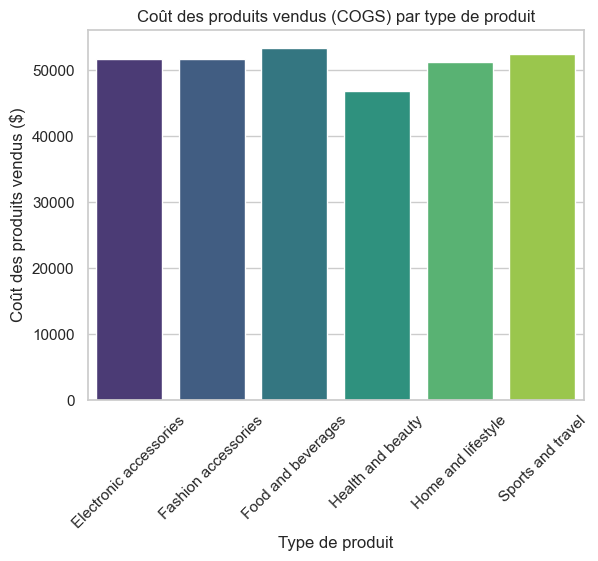

In [126]:
## COGS (Coût des produits vendus) par type de produit

cogs_per_product = df.groupby('Product line')['cogs'].sum().reset_index()
sns.barplot(data=cogs_per_product, x='Product line', hue='Product line', y='cogs', palette='viridis')
plt.title('Coût des produits vendus (COGS) par type de produit')
plt.xlabel('Type de produit')
plt.ylabel('Coût des produits vendus ($)')
plt.xticks(rotation=45)
plt.show()


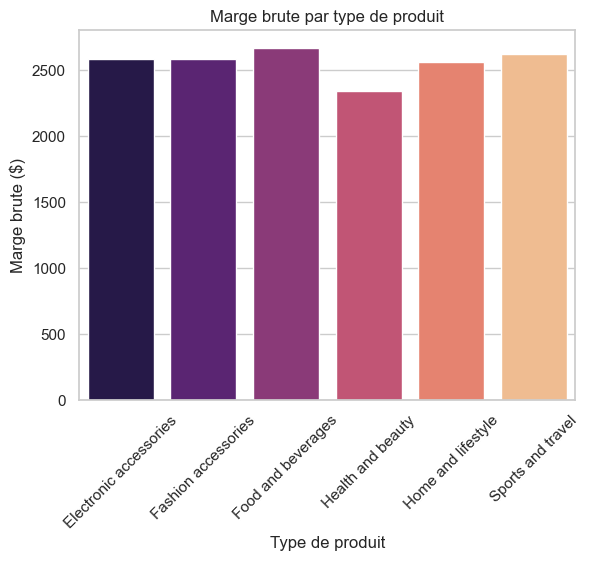

In [128]:
# Marge brute par type de produit

df['gross_margin'] = df['Total'] - df['cogs']
gross_margin_per_product = df.groupby('Product line')['gross_margin'].sum().reset_index()
sns.barplot(data=gross_margin_per_product, x='Product line', hue='Product line', y='gross_margin', palette='magma')
plt.title('Marge brute par type de produit')
plt.xlabel('Type de produit')
plt.ylabel('Marge brute ($)')
plt.xticks(rotation=45)
plt.show()


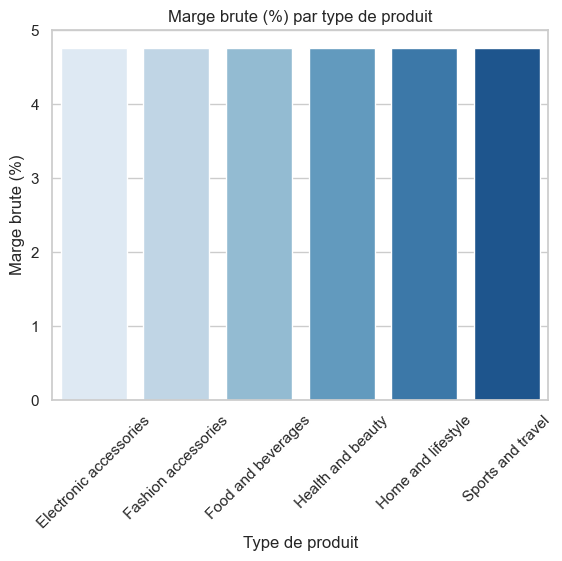

In [130]:
#  Calcul de la marge brute (%)

df['gross_margin_percent'] = (df['gross_margin'] / df['Total']) * 100
gross_margin_percent_per_product = df.groupby('Product line')['gross_margin_percent'].mean().reset_index()
sns.barplot(data=gross_margin_percent_per_product, x='Product line', hue='Product line', y='gross_margin_percent', palette='Blues')
plt.title('Marge brute (%) par type de produit')
plt.xlabel('Type de produit')
plt.ylabel('Marge brute (%)')
plt.xticks(rotation=45)
plt.show()

# 🧠 Étape suivante : Prédire la satisfaction client (Rating)
### Pour besoin de lisibilité nous allons importer de nouveau nos packages et modules.

In [203]:
# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## 1- Modèle de régression linéaire

In [205]:


# Chargement du dataset
df = pd.read_csv('supermarket_sales - Sheet1.csv')

# Suppression des colonnes inutiles
df = df.drop(columns=['Tax 5%', 'gross income', 'gross margin percentage'])

# Traitement des variables catégorielles (encodage One-Hot)
categorical_features = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
numeric_features = ['Unit price', 'Quantity', 'Total', 'cogs', 'Rating']

# Diviser les données en variables explicatives (X) et variable cible (y)
X = df[categorical_features + numeric_features[:-1]]  # Tout sauf 'Rating'
y = df['Rating']  # Notre variable cible

# Split des données en jeu d'entraînement et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construction du pipeline de prétraitement et modèle
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', 'passthrough', numeric_features[:-1])  # Exclure 'Rating' pour les variables numériques
    ])

# Création du pipeline complet avec régression linéaire
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Entraînement du modèle
pipeline.fit(X_train, y_train)

# Prédictions
y_pred = pipeline.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")




RMSE: 1.762781217723681
R²: -0.012907497737591811


##  Interprétation des performances du modèle

#### Si le R² est proche de 1, le modèle explique bien la variance de la variable cible.

#### Si le RMSE est bas (proche de 0), cela signifie que les erreurs de prédiction sont faibles.
""" → Ce résultat est très mauvais, voire inquiétant. Un R² négatif indique:
que le modèle fait pire que si on prédisait simplement la moyenne de la variable cible pour tout le monde.
En clair, la régression linéaire n’arrive pas du tout à capturer la relation entre les variables explicatives et la satisfaction (rating)."""

## 2- Random Forest Regressor

In [161]:
##  Entraînement du modèle

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Encoder les variables catégorielles
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# S'assurer que les deux ensembles ont les mêmes colonnes
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Entraînement
rf_model.fit(X_train_encoded, y_train)
y_pred_rf = rf_model.predict(X_test_encoded)

# Prédiction
y_pred_rf = rf_model.predict(X_test_encoded)  # ✅ C’est celle-ci qu’il faut utiliser


# Évaluation
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("🔍 Random Forest Regressor")
print(f"RMSE: {rmse_rf}")
print(f"R²: {r2_rf}")


🔍 Random Forest Regressor
RMSE: 1.8791117981642282
R²: -0.15100761131755647


#### Regardons un instant l'importance que Forest regressor donne aux différentes variable

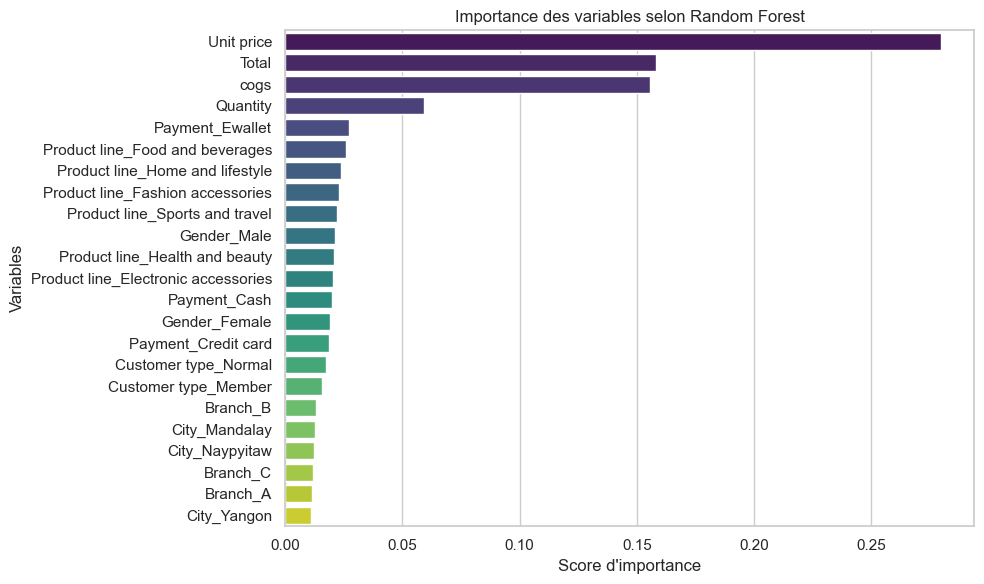

In [208]:
# Récupérer l'importance des features
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train_encoded.columns)

# Trier par ordre décroissant
feature_importances = feature_importances.sort_values(ascending=False)

# Affichage
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, hue=feature_importances.index, palette="viridis")
plt.title("Importance des variables selon Random Forest")
plt.xlabel("Score d'importance")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()


L'analyse des variables les plus influentes montre que le prix unitaire, 
le montant total et le coût des produits auraient le plus d'impact sur la satisfaction client( meme si l'impact dans ce cas n'est pas élevée).  
À l'inverse, des facteurs comme le type de produit, la localisation ou le genre n’ont que peu d'effet. 
Cela suggère que les clients évaluent surtout leur expérience en fonction de la valeur perçue et du processus de paiement, 
plus que de la catégorie de produit achetée.

#### Corrélations entre variables
#### Matrice de corrélation 

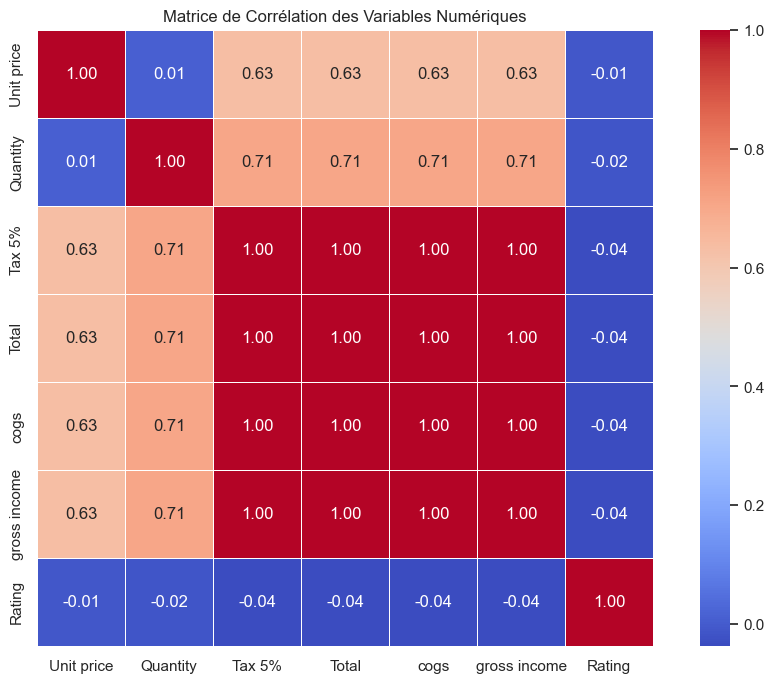

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt
daf= pd.read_csv('supermarket_sales - Sheet1.csv')
# Calcul de la matrice de corrélation (seulement les variables numériques) exclu gross margin percentage qui est une constante
daf=daf.drop(columns=['gross margin percentage'])
corr_matrix = daf.select_dtypes(include=['float64', 'int64']).corr()

# Affichage de la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Matrice de Corrélation des Variables Numériques")
plt.show()


Cela indique que les variables disponibles dans ce dataset n’expliquent pas fortement la satisfaction client. 
On voit aussi une parfaite corrélation( r=1.00) entre plusieurs variables. Ce qui indique une rédondance de plusieurs valeurs dans la database considérée. 

## ✅ Conclusion - Modélisation de la satisfaction client

Dans ce projet, nous avons tenté de prédire la satisfaction des clients (`Rating`) à partir des informations disponibles dans un jeu de données de ventes de supermarché.

### 🎯 Objectif
L'objectif était d'entraîner un modèle de régression pour anticiper la note de satisfaction client, et ainsi fournir des leviers d'amélioration à l’entreprise.

### ⚙️ Modélisation
Nous avons testé plusieurs modèles, dont un **Random Forest Regressor**, avec des résultats décevants :
- **RMSE** : 1.87 (sur une échelle de 1 à 10)
- **R²** : -0.15 (très faible pouvoir explicatif)

### 🔍 Analyse des résultats
- Les variables **`Unit price`, `Total`, `COGS`, `Tax 5%`, `Gross income`** sont très redondantes (corrélation = 1), ce qui a probablement biaisé le modèle.
- La variable **`Gross margin percentage`** est constante : elle n'apporte aucune valeur prédictive.
- Les variables les plus importantes selon Random Forest sont liées au **prix**, mais leur influence sur la note reste limitée.
- Le `Rating` a des corrélations **très faibles** avec toutes les autres variables, ce qui montre qu’il dépend d’éléments **non mesurés dans le dataset**.

### 📌 Conclusion
> Le modèle ne parvient pas à prédire efficacement la satisfaction client, car les variables disponibles ne capturent pas les véritables facteurs d'influence (accueil, ambiance, attente, etc.).

Ce projet met en évidence les **limites du Machine Learning** lorsque les données ne sont pas adaptées à la cible. Il souligne aussi l'importance de l’analyse exploratoire en amont, pour mieux guider les choix de modélisation. 
### Recommandation
Pour mieux modéliser le Rating, il serait utile d’ajouter d'autres sources de données (questionnaires, durée de passage, avis client, etc.).
